In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
boston=datasets.load_boston()

In [11]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
X=boston.data
y=boston.target

In [15]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predictions=model.predict(X)

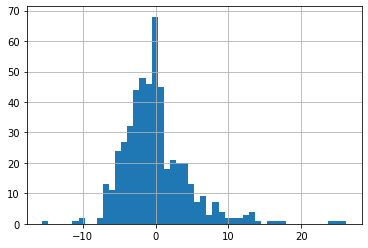

In [18]:
pd.Series(y - predictions).hist(bins=50)

In [19]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [20]:
model.intercept_

36.459488385089855

In [23]:
model2=LinearRegression(normalize=True) #pour éviter que des features prennent le pas sur d'autres on normalise

In [24]:
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
predictions=model2.predict(X)

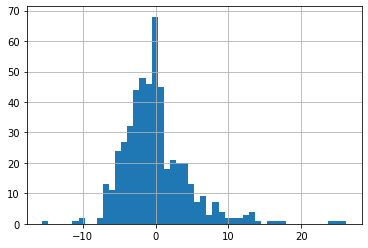

In [28]:
pd.Series(y - predictions).hist(bins=50)

In [29]:
model2.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(y,predictions)

3.270862810900315

In [33]:
mean_squared_error(y,predictions)

21.894831181729202

In [36]:
n_bootstraps = 1000
len_boston = len(boston.target)
subsample_size = np.int(0.5*len_boston)

subsample = lambda: np.random.choice(np.arange(0, len_boston),size=subsample_size)
coefs = np.ones(n_bootstraps) #pre-allocate the space for the coefs
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    model.fit(subsample_X, subsample_y)
    coefs[i] = model.coef_[0]


Text(0.5, 1.0, 'Histogram du coef_[0] du modèle.')

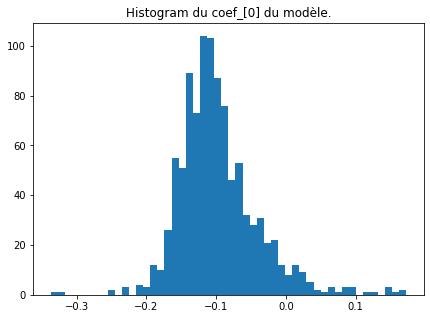

In [38]:
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram du coef_[0] du modèle, c'est à dire CRIMINALITE.")
#l'influence de ce critère est donc tout à fait restreinte

In [42]:
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    model.fit(subsample_X, subsample_y)
    coefs[i] = model.coef_[4] #même test avec les NOX

Text(0.5, 1.0, "Histogram du coef_[4] du modèle, c'est à dire NOX.")

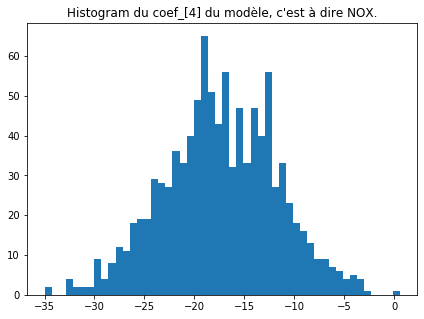

In [43]:
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram du coef_[4] du modèle, c'est à dire NOX.")
#l'influence de ce critère est donc plus représentative